In [38]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import os 

# Uncertainty for weed, crop, background segementation

For a more detailed description of the experiments and the uncertainty calculation see [here](https://openaccess.thecvf.com/content/ICCV2023W/CVPPA/papers/Celikkan_Semantic_Segmentation_of_Crops_andWeeds_with_Probabilistic_Modeling_and_Uncertainty_ICCVW_2023_paper.pdf)

In [39]:
data_path = Path("C:/Users/cwinklm/Documents/AggroUQ/2025-02-05_msi_vi")
error_files = [f for f in os.listdir(data_path) if "error" in f]
entropy_files = [f for f in os.listdir(data_path) if "entropy" in f]

### Maximum Entropy for 3 class segmentation

In [49]:
n_classes = 3 # weed, crop, background
max_entropy = n_classes*(1/n_classes * np.log2(n_classes)) # maximum entropy at uniform distribution

In [45]:
avg_entropy = []
avg_entropy_normed = []

for i in range(1, len(entropy_files)):
    uq_map = np.load(data_path.joinpath(entropy_files[i]))
    avg_entropy.append(np.mean(uq_map))
    avg_entropy_normed.append(np.mean(uq_map)/max_entropy)


### Entropy distribution    

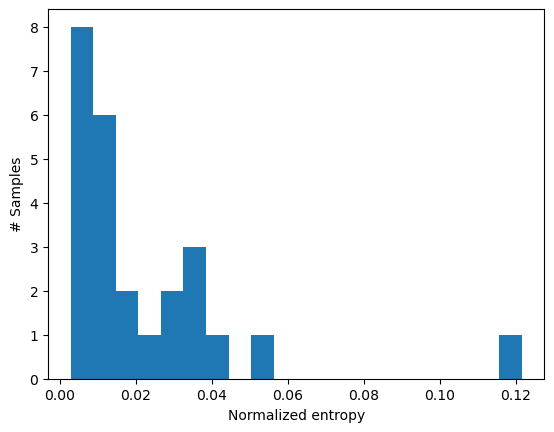

In [52]:
plt.hist(avg_entropy_normed, bins=20)

plt.xlabel("Normalized entropy")
plt.ylabel("# Samples")

plt.show()

In [57]:
np.argsort(avg_entropy_normed)

array([24, 15, 21, 18, 23, 20, 14,  2, 11, 10,  8, 17,  5,  1,  7,  4, 22,
       19, 16,  3,  0,  6, 13,  9, 12])

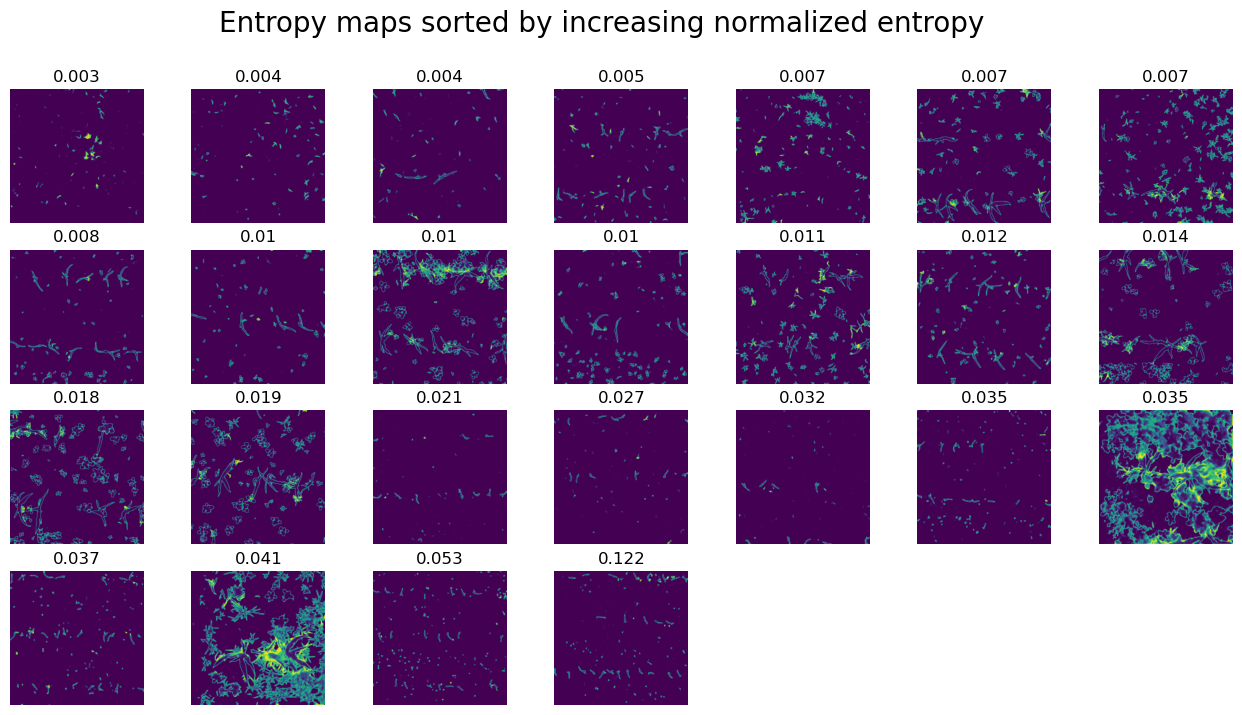

In [67]:
#entropy_files = entropy_files[]

plt.figure(figsize=(16,8))

for i, idx in enumerate(np.argsort(avg_entropy_normed)):
    plt.subplot(4,7,i+1)
    uq_map = np.load(data_path.joinpath(entropy_files[idx]))
    plt.imshow(uq_map, cmap='viridis')
    #plt.title(f"{np.round(np.float64(np.min(uq_map)), 2)}, {np.round(np.float64(np.mean(uq_map)), 2)}, {np.round(np.float64(np.max(uq_map)),2)}")
    plt.title(f"{np.round(np.float64(avg_entropy_normed[idx]), 3)}")
    plt.axis('off')

    plt.suptitle("Entropy maps sorted by increasing normalized entropy", size=20)
    plt.savefig("CropData_EntropyMaps.png") 

C:\Users\cwinklm\AppData\Local\Temp\ipykernel_42536\1335349574.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([uq_true.flatten(), uq_false.flatten()], labels=["True", "False"], flierprops=flierprops)


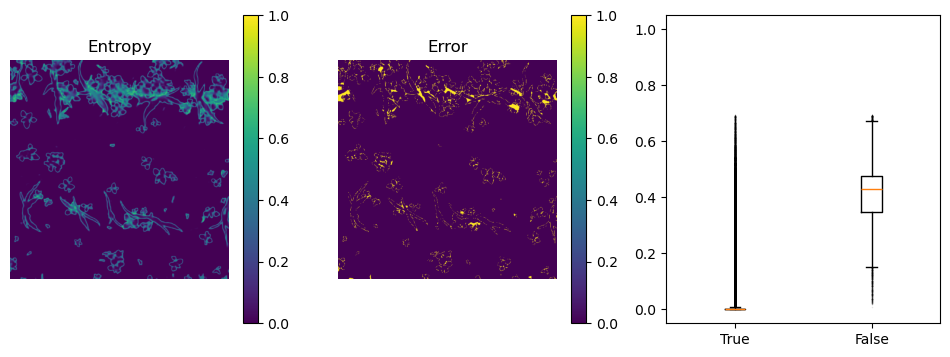

In [ ]:
IDX = 10

plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
uq_map = np.load(data_path.joinpath(entropy_files[IDX]))
plt.imshow(uq_map/max_entropy, cmap='viridis', vmin=0, vmax=1)
plt.title("Entropy")
plt.colorbar()
plt.axis('off')

plt.subplot(1,3,2)
error_map = np.load(data_path.joinpath(error_files[IDX]))
plt.imshow(error_map, cmap='viridis')
plt.title("Error")
plt.colorbar()
plt.axis('off')

plt.subplot(1,3,3)
uq_true = uq_map[error_map == 0]/max_entropy
uq_false = uq_map[error_map == 1]/max_entropy
flierprops = {"marker":'x', "markersize":.5, "alpha":0.1} 
plt.boxplot([uq_true.flatten(), uq_false.flatten()], labels=["True", "False"], flierprops=flierprops)
plt.ylim(-0.05, 1.05)
plt.show()